In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market/HDFCBANK.csv
/kaggle/input/stock-market/GRASIM.csv
/kaggle/input/stock-market/WIPRO.csv
/kaggle/input/stock-market/BPCL.csv
/kaggle/input/stock-market/APOLLOHOSP.csv
/kaggle/input/stock-market/INFY.csv
/kaggle/input/stock-market/LT.csv
/kaggle/input/stock-market/RELIANCE.csv
/kaggle/input/stock-market/BRITANNIA.csv
/kaggle/input/stock-market/HEROMOTOCO.csv
/kaggle/input/stock-market/HINDUNILVR.csv
/kaggle/input/stock-market/TATAMOTORS.csv
/kaggle/input/stock-market/MM.csv
/kaggle/input/stock-market/JSWSTEEL.csv
/kaggle/input/stock-market/SBILIFE.csv
/kaggle/input/stock-market/TITAN.csv
/kaggle/input/stock-market/HINDALCO.csv
/kaggle/input/stock-market/AXISBANK.csv
/kaggle/input/stock-market/HCLTECH.csv
/kaggle/input/stock-market/TATACONSUM.csv
/kaggle/input/stock-market/ADANIPORTS.csv
/kaggle/input/stock-market/NIFTY 50.csv
/kaggle/input/stock-market/BAJAJFINSV.csv
/kaggle/input/stock-market/BAJFINANCE.csv
/kaggle/input/stock-market/ICICIBANK.csv
/kaggle/inpu

In [104]:
data = pd.read_csv('/kaggle/input/stock-market/ADANIENT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,1.364148,1.401700,1.334259,1.362615,-0.010443,1080397
1,2002-07-02,1.386372,1.390971,1.356484,1.373344,-0.010525,1016147
2,2002-07-03,1.371811,1.387139,1.364914,1.373344,-0.010525,980394
3,2002-07-04,1.379475,1.401700,1.379475,1.381008,-0.010584,972747
4,2002-07-05,1.388672,1.388672,1.372578,1.377942,-0.010560,974496


In [105]:
data = data[['Date', 'Close']]
data.head()

,Date,Close
0,2002-07-01,1.362615
1,2002-07-02,1.373344
2,2002-07-03,1.373344
3,2002-07-04,1.381008
4,2002-07-05,1.377942


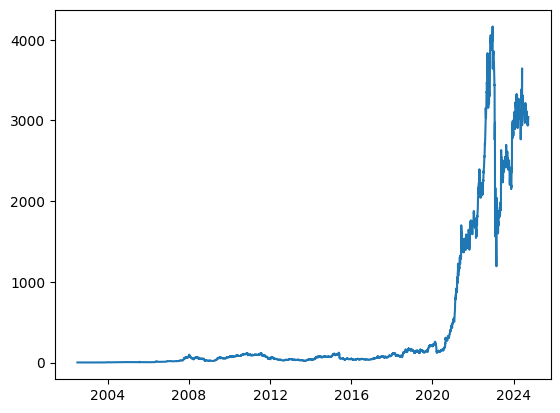

In [106]:
import matplotlib.pyplot as plt
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

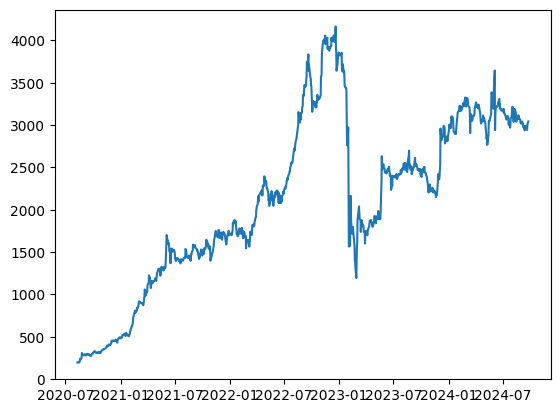

In [107]:
temp = data[4500:]
plt.plot(temp['Date'], temp['Close'])

In [108]:
from copy import deepcopy as dc 
def get_windowed(data, n):
    df = dc(data)
    for i in range(1, n+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

In [109]:
backcandle = 10
window_df = get_windowed(temp, backcandle)
window_df

,Date,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
4510,2020-08-24,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000,197.699997,195.850006,195.699997
4511,2020-08-25,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000,197.699997,195.850006
4512,2020-08-26,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000,197.699997
4513,2020-08-27,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000
4514,2020-08-28,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997
...,...,...,...,...,...,...,...,...,...,...,...,...
5516,2024-09-17,2975.199951,2984.899902,2968.350098,2991.000000,2937.850098,2986.399902,2964.149902,2975.449951,3015.350098,3012.350098,3036.100098
5517,2024-09-18,2956.300049,2975.199951,2984.899902,2968.350098,2991.000000,2937.850098,2986.399902,2964.149902,2975.449951,3015.350098,3012.350098
5518,2024-09-19,2943.149902,2956.300049,2975.199951,2984.899902,2968.350098,2991.000000,2937.850098,2986.399902,2964.149902,2975.449951,3015.350098
5519,2024-09-20,3008.500000,2943.149902,2956.300049,2975.199951,2984.899902,2968.350098,2991.000000,2937.850098,2986.399902,2964.149902,2975.449951


In [110]:
# window_df.set_index('Date', inplace=True)
window_df.head(10)

,Date,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
4510,2020-08-24,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000,197.699997,195.850006,195.699997
4511,2020-08-25,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000,197.699997,195.850006
4512,2020-08-26,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000,197.699997
4513,2020-08-27,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997,200.750000
4514,2020-08-28,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003,196.199997
4515,2020-08-31,279.549988,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997,197.800003
4516,2020-09-01,281.100006,279.549988,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003,213.699997
4517,2020-09-02,293.049988,281.100006,279.549988,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000,239.550003
4518,2020-09-03,291.250000,293.049988,281.100006,279.549988,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006,234.000000
4519,2020-09-04,285.149994,291.250000,293.049988,281.100006,279.549988,288.250000,286.700012,285.549988,307.549988,248.699997,233.350006


In [111]:
np_df = window_df.to_numpy()
dates = np_df[:, 0]

In [112]:
np_df

array([[Timestamp('2020-08-24 00:00:00'), 248.6999969482422,
        233.3500061035156, ..., 197.6999969482422, 195.8500061035156,
        195.6999969482422],
       [Timestamp('2020-08-25 00:00:00'), 307.54998779296875,
        248.6999969482422, ..., 200.75, 197.6999969482422,
        195.8500061035156],
       [Timestamp('2020-08-26 00:00:00'), 285.54998779296875,
        307.54998779296875, ..., 196.1999969482422, 200.75,
        197.6999969482422],
       ...,
       [Timestamp('2024-09-19 00:00:00'), 2943.14990234375,
        2956.300048828125, ..., 2964.14990234375, 2975.449951171875,
        3015.35009765625],
       [Timestamp('2024-09-20 00:00:00'), 3008.5, 2943.14990234375, ...,
        2986.39990234375, 2964.14990234375, 2975.449951171875],
       [Timestamp('2024-09-23 00:00:00'), 3043.949951171875, 3008.5, ...,
        2937.85009765625, 2986.39990234375, 2964.14990234375]],
      dtype=object)

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_df = scaler.fit_transform(np_df[:, 1:])

scaled_df

array([[-1.        , -1.        , -0.99966938, ..., -0.99924416,
        -1.        , -1.        ],
       [-0.96994843, -0.99219217, -1.        , ..., -0.99770729,
        -0.99906789, -0.99992442],
       [-0.98118266, -0.96225792, -0.99219217, ..., -1.        ,
        -0.99753115, -0.99899234],
       ...,
       [ 0.3759128 ,  0.38503805,  0.39465155, ...,  0.39474946,
         0.40049633,  0.42062184],
       [ 0.40928363,  0.37834918,  0.38503805, ...,  0.40596107,
         0.39480282,  0.40051899],
       [ 0.42738604,  0.41158974,  0.37834918, ...,  0.38149718,
         0.40601345,  0.3948257 ]])

In [114]:
X = scaled_df[:, 1:]
y = scaled_df[:, 0]
X = X.astype(np.float32) 
y = y.astype(np.float32)
X.shape, y.shape

((1011, 10), (1011,))

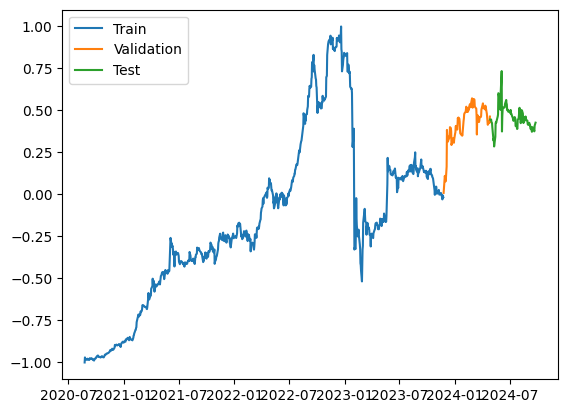

In [115]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [116]:
X = dc(np.flip(X, axis=1))
X

array([[-1.        , -1.        , -0.99924415, ..., -0.9968464 ,
        -0.9996694 , -1.        ],
       [-0.9999244 , -0.9990679 , -0.9977073 , ..., -0.9996694 ,
        -1.        , -0.99219215],
       [-0.9989923 , -0.9975312 , -1.        , ..., -1.        ,
        -0.99219215, -0.9622579 ],
       ...,
       [ 0.42062184,  0.40049633,  0.39474946, ...,  0.39958546,
         0.39465156,  0.38503805],
       [ 0.40051898,  0.39480284,  0.40596107, ...,  0.39465156,
         0.38503805,  0.37834918],
       [ 0.3948257 ,  0.40601346,  0.38149717, ...,  0.38503805,
         0.37834918,  0.41158974]], dtype=float32)

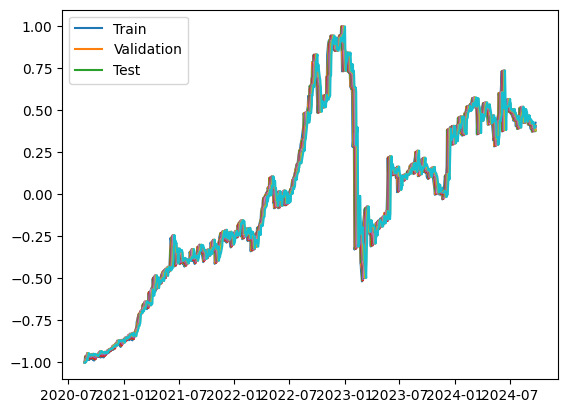

In [117]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], sc_X[:q_80], sc_y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], sc_X[q_80:q_90], sc_y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], sc_X[q_90:], sc_y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input((backcandle, 1)),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,065 (78.38 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1750 - mean_absolute_error: 0.3122 - val_loss: 0.0219 - val_mean_absolute_error: 0.1405
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.1040 - val_loss: 0.0039 - val_mean_absolute_error: 0.0477
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0418 - val_loss: 0.0030 - val_mean_absolute_error: 0.0398
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0299 - val_loss: 0.0028 - val_mean_absolute_error: 0.0383
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0286 - val_loss: 0.0026 - val_mean_absolute_error: 0.0359
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0303 - val_loss: 0.0027 - val_mean_absolute_error: 0.0379
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0273 - val_los

In [ ]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_absolute_error'], label='MSE (validation data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(train_predictions)
plt.plot(y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
print(history.history)

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(test_predictions)
plt.plot(y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
model.save('stock.keras')